In [1]:
## RASDS (RAS Dependency Score)

In [2]:
# Libraries
library(SummarizedExperiment)
source("R/RASDS.R")

Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which, which.max, which.min


Loading required package: S4Vecto

In [3]:
# Resected cases in PCSI
metaGxPancreas <- readRDS("data/metaGxPancreas.rds")
names(metaGxPancreas)

[1] "BADEA"          "BALAGURANATHAN" "BAUER"          "CHEN"          
 [5] "COLLISSON"      "GRUTZMANN"      "HAIDER"         "HAMIDI"        
 [9] "ICGCMICRO"      "ICGCSEQ"        "JANKY"          "KIRBY"         
[13] "LUNARDI"        "OUH"            "PCSI"           "PEI"           
[17] "TCGA"           "UNC"            "WINTER"         "YANG"          
[21] "ZHANG"

In [4]:
pcsi <- metaGxPancreas$PCSI
pcsiRawTPM <- 2^assays(pcsi)$exprs
pcsiData <- transExp(pcsiRawTPM)

rownames(pcsiData)[which(rownames(pcsiData) == "KDF1")] <- "C1orf172"
rownames(pcsiData)[which(rownames(pcsiData) == "ADGRF4")] <- "GPR115"
rownames(pcsiData)[which(rownames(pcsiData) == "AOC1")] <- "ABP1"
rownames(pcsiData)[which(rownames(pcsiData) == "MIR4435-2HG")] <- "LOC541471"

In [5]:
results <- c()
for(idx in c(1:ncol(pcsiData))) {
	dat <- as.vector(pcsiData[,idx])
	names(dat) <- rownames(pcsiData)
	lscore <- calcLScore(dat)
	sscore <- calcSScore(dat)
	res <- c(colnames(pcsiData)[idx], lscore, sscore)
	results <- rbind(results, res)
}
pcsiResults <- data.frame(Sample = results[,1], lscore = as.numeric(results[,2]),
    sscore = as.numeric(results[,3]))

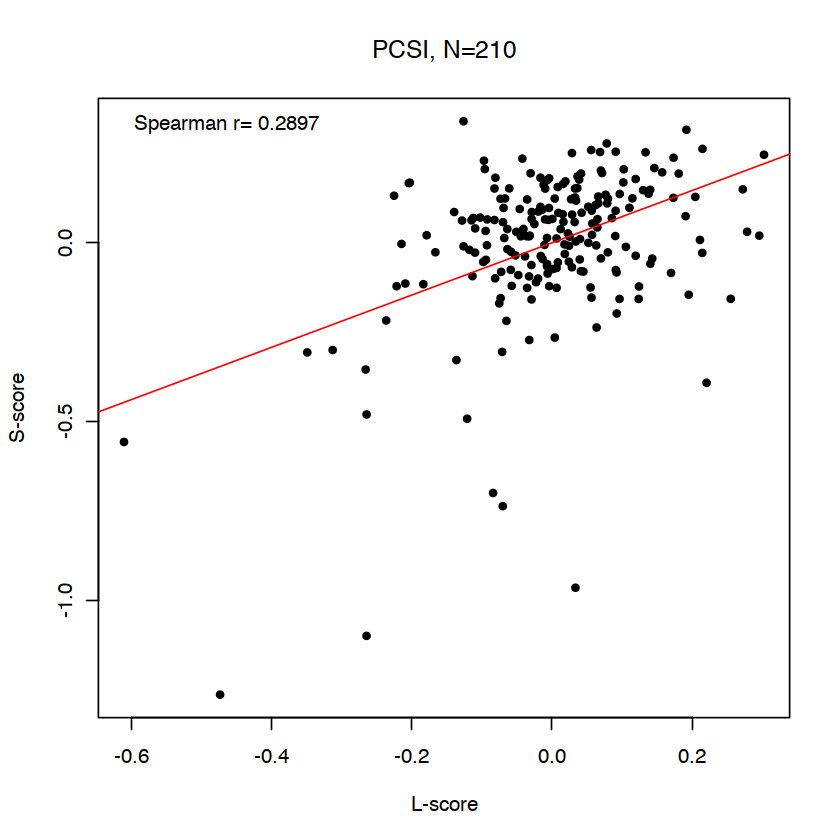

In [6]:
plot(pcsiResults$lscore, pcsiResults$sscore, pch=20, xlab="L-score", ylab="S-score", 
     main=paste0("PCSI, N=", nrow(pcsiResults)))
abline(lm(sscore ~ lscore, data=pcsiResults), col="red")
legend("topleft", legend=paste0("Spearman r= ", round(cor(pcsiResults$lscore, pcsiResults$sscore, method="spearman"), 4)), bty="n")

In [7]:
# Advanced cases in COMPASS
compass <- readRDS("data/COMPASS.rds")
compassRawTPM <- 2^assays(compass)$exprs
compassData <- transExp(compassRawTPM)

rownames(compassData)[which(rownames(compassData) == "KDF1")] <- "C1orf172"
rownames(compassData)[which(rownames(compassData) == "ADGRF4")] <- "GPR115"
rownames(compassData)[which(rownames(compassData) == "AOC1")] <- "ABP1"
rownames(compassData)[which(rownames(compassData) == "MIR4435-2HG")] <- "LOC541471"

In [8]:
results <- c()
for(idx in c(1:ncol(compassData))) {
	dat <- as.vector(compassData[,idx])
	names(dat) <- rownames(compassData)
	lscore <- calcLScore(dat)
	sscore <- calcSScore(dat)
	res <- c(colnames(compassData)[idx], lscore, sscore)
	results <- rbind(results, res)
}
compassResults <- data.frame(Sample = results[,1], lscore = as.numeric(results[,2]),
    sscore = as.numeric(results[,3]))

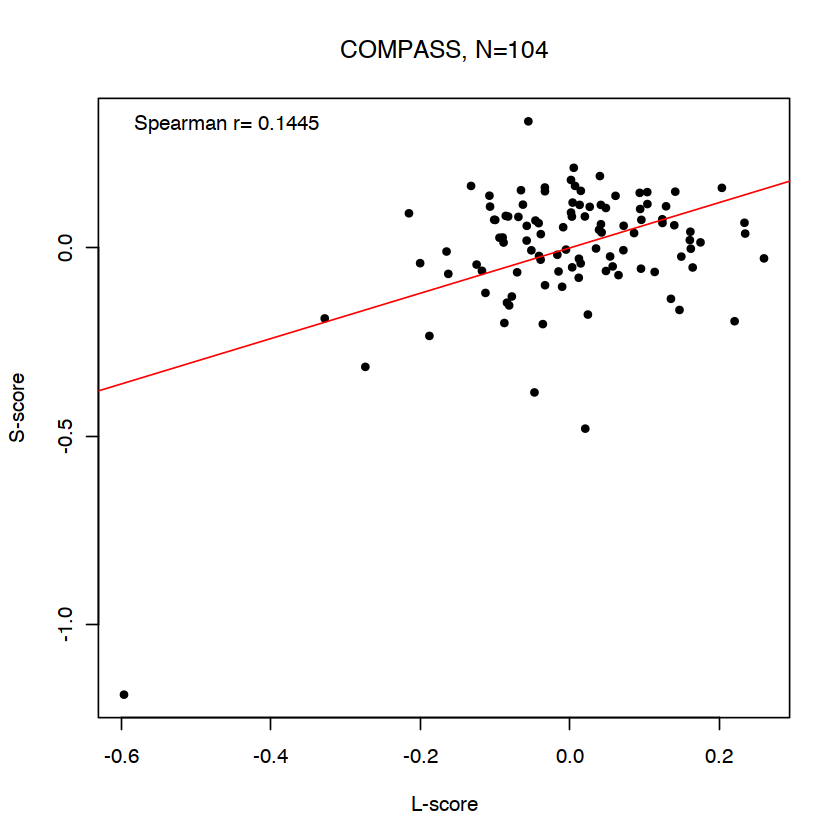

In [9]:
plot(compassResults$lscore, compassResults$sscore, pch=20, xlab="L-score", ylab="S-score", 
     main=paste0("COMPASS, N=", nrow(compassResults)))
abline(lm(sscore ~ lscore, data= compassResults), col="red")
legend("topleft", legend=paste0("Spearman r= ", round(cor(compassResults$lscore, compassResults$sscore, method="spearman"), 4)), bty="n")

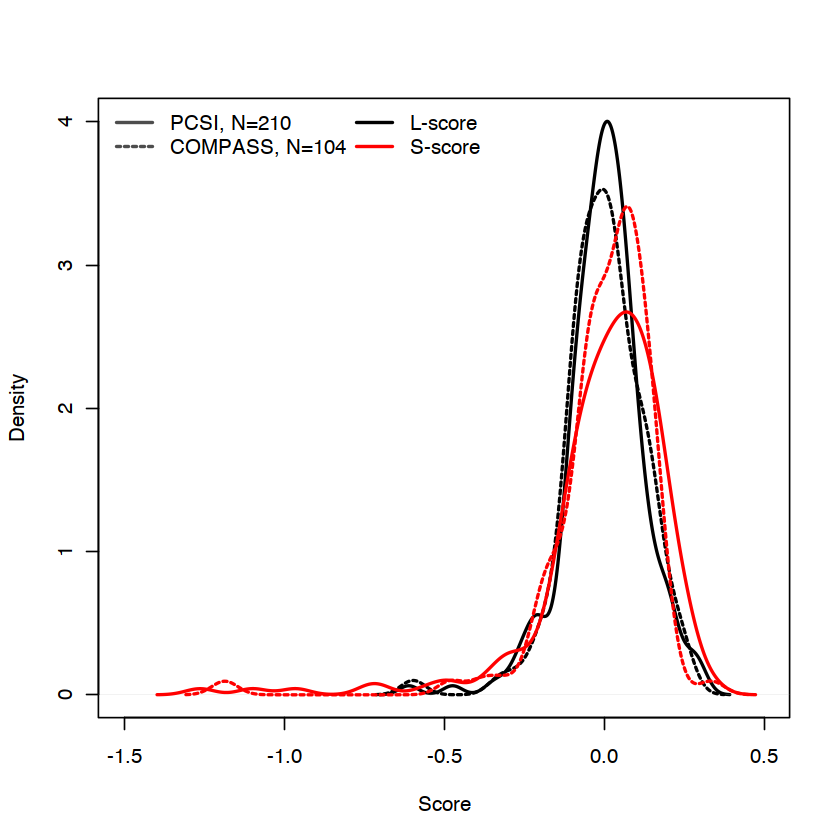

In [10]:
plot(density(as.numeric(pcsiResults$lscore)), xlim=c(-1.5, 0.5), main="", xlab="Score", lwd=2)
lines(density(as.numeric(compassResults$lscore)), lty=2, lwd=2)
lines(density(as.numeric(pcsiResults$sscore)), lty=1, col="red", lwd=2)
lines(density(as.numeric(compassResults$sscore)), lty=2, col="red", lwd=2)
legend("topleft", legend=c("PCSI, N=210", "COMPASS, N=104", "L-score", "S-score"), 
    lty=c(1,2,1,1), lwd=2, col=c("grey30", "grey30", "black", "red"), ncol=2, bty="n")